# chap20 전이학습을 통한 딥러닝의 성능 극대화

## 1 .  소규모 데이터셋으로 만드는 강력한 학습모델

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout,\
                                    Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [6]:
#  기존의 이미지의 갯수를 늘리는 작업 : 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255,   #  정규화
                  horizontal_flip=True,              # 수평으로 뒤집기
                  width_shift_range=0.1,             # 수평이동
                  height_shift_range=0.1,            # 수직이동
                  fill_mode='nearest')               # 빈 공간 채우는 방법

train_genarator = train_datagen.flow_from_directory(
                './data/chap20-data/train',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)  # 테스트셋은 정규화만
test_generator = test_datagen.flow_from_directory(
                './data/chap20-data/test',           # 학습셋이 있는 폴더의 위치
                target_size=(150,150),
                batch_size=5,
                class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [4]:
# CNN 모델 적용
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation (Activation)     (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [7]:
# 컴파일 옵션 설정
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002),
             metrics=['accuracy'])

# 조기 중단 설정
early_stopping = EarlyStopping(patience=5)

# 모델 실행
history = model.fit(train_genarator, epochs=200, validation_data=test_generator,
                   validation_steps=10, callbacks=[early_stopping])

Epoch 1/200
32/32 [==============================] - 4s 96ms/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 2s 61ms/step - loss: 0.6937 - accuracy: 0.4750 - val_loss: 0.6905 - val_accuracy: 0.5400
Epoch 3/200
32/32 [==============================] - 2s 59ms/step - loss: 0.6923 - accuracy: 0.4812 - val_loss: 0.6925 - val_accuracy: 0.4600
Epoch 4/200
32/32 [==============================] - 2s 61ms/step - loss: 0.6879 - accuracy: 0.5688 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 2s 62ms/step - loss: 0.6853 - accuracy: 0.6125 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 2s 64ms/step - loss: 0.6673 - accuracy: 0.6187 - val_loss: 0.6606 - val_accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 0.6372 - accuracy: 0.6313 - val_loss: 0.6038 - val_accuracy: 0.6400
Epoch 

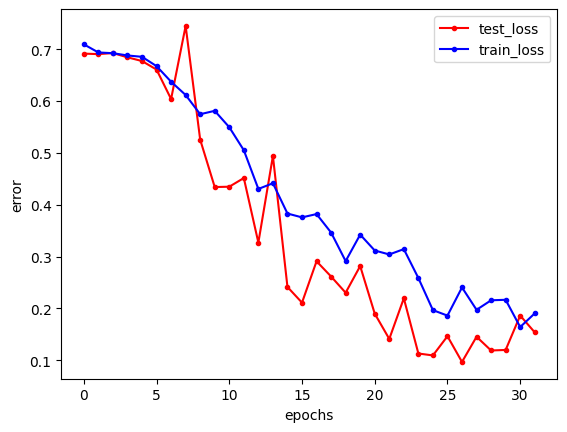

In [8]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

#  그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')

plt.show()